# 1. 기본 세팅

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['axes.grid'] = False

color = sns.color_palette()
plt.style.use("fivethirtyeight")
import matplotlib.font_manager as fm

In [2]:
parameters = {'axes.labelsize': 10,
              'axes.titlesize': 15, 
              'figure.titlesize': 17, 
              'xtick.labelsize': 11, 
              'ytick.labelsize': 14, 
              'legend.fontsize': 12, 
              'legend.title_fontsize': 13}
plt.rcParams.update(parameters)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 확인하기

In [4]:
## train 데이터 로드
train = pd.read_csv("./PUBG_train_V2.csv")

In [5]:
## 데이터 확인
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
## 행/열 확인
print(train.shape)
# 컬럼별 결측치 개수 확인
print(train.isnull().sum())

(4446966, 29)
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64


In [7]:
## 메모리 최적화하기
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df
train = reduce_mem_usage(train)

# 3. 분포 확인하기

## 변수별 histplot
* "Kill", "longestKill", "walkDistance", "rideDistance", "swimDistance" 등 target 변수에 유의미한 영향을 줄 것으로 예상되는 변수들의 분포 불균형이 심한 것으로 판단됨
* "4. 데이터 전처리 - 이상치 탐색 파트"에서 이상치 제거 예정

<br>**플레이어들의 Kill 횟수 분포**

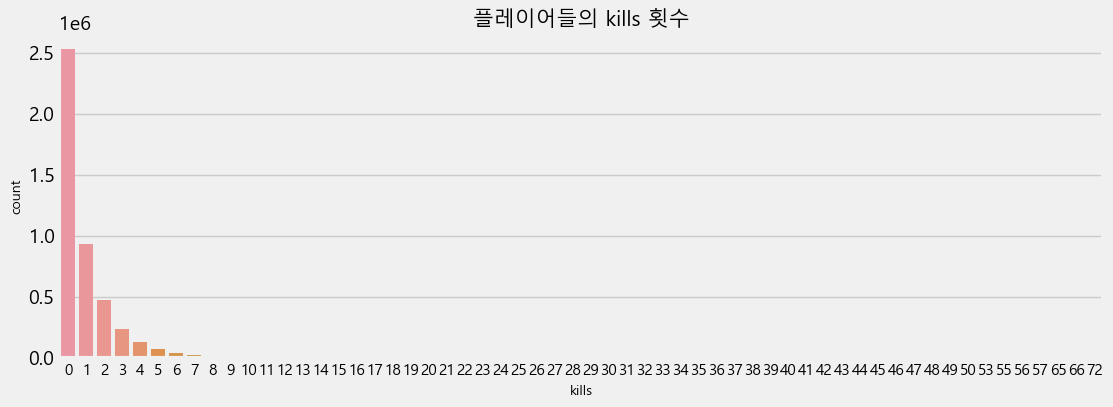


 kills 횟수 평균: 0.9247833241810259


In [8]:
## 플레이어들의 Kill 횟수 분포
plt.figure(figsize=(12,4))
sns.countplot(x='kills', data=train)
plt.title('플레이어들의 kills 횟수')
plt.show()

print("\n", "kills 횟수 평균:", train['kills'].mean())

**해석**
* 대부분의 플레이어들은 0킬이고, 적게는 1킬부터 많게는 72킬까지 넓게 분포함

<br>**플레이어들의 matchDuration 분포**

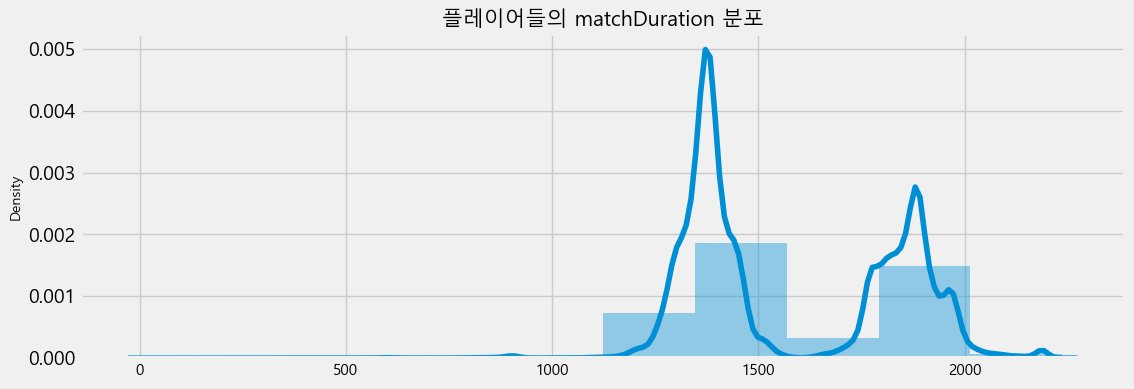

In [9]:
## 플레이어들의 matchDuration(매치지속시간) 분포
plt.figure(figsize=(12,4))
sns.distplot(x=train['matchDuration'], bins=10)
plt.title('플레이어들의 matchDuration 분포')
plt.show()

**해석**
* 대부분의 플레이어는 1000초 이상 매치를 지속함

<br>**플레이어들의 teamKills 횟수 분포**

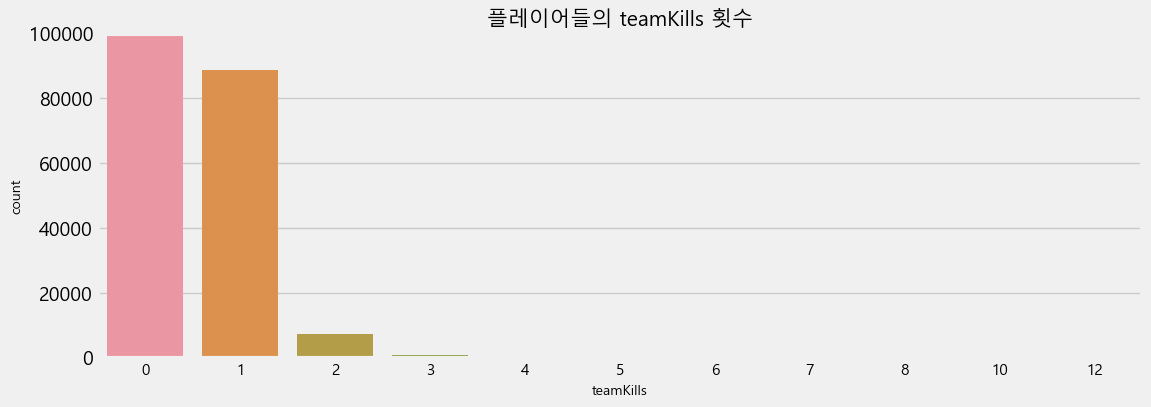

In [10]:
## 플레이어들의 팀킬 횟수 분포
plt.figure(figsize=(12,4))
sns.countplot(x='teamKills', data=train)
plt.title('플레이어들의 teamKills 횟수')
plt.ylim([0, 100000])   # y축 범위 제한해서 보기
plt.show()

**해석**
* 대부분의 플레이어들은 팀킬을 하지 않지만, 1번하는 경우가 8만 건 이상임
* 팀킬을 하는 이유는 다음과 같이 추측해볼 수 있음
    * 단순히 재미를 위해 (딱히 이유는 없는..)
    * 팀원이 너무 못해서 (게임에 도움이 되지 않을 것 같아서..)

<br>**플레이어들의 longestKill 분포**

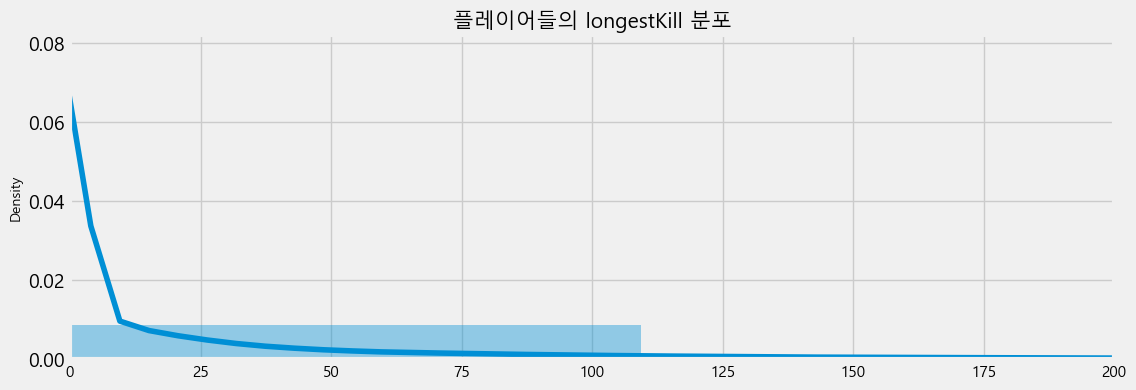

In [11]:
## 플레이어들의 longestKill 분포
plt.figure(figsize=(12,4))
sns.distplot(x=train['longestKill'], bins=10)
plt.title('플레이어들의 longestKill 분포')
plt.xlim([0, 200])   # x축 범위 제한해서 보기
plt.show()

**해석**
* 대부분 0~25m 이내에 분포하고 있으나, 간혹 아주 먼 거리에서 죽이는 경우도 존재함 (이상치 제거 필요)

<br>**플레이어들의 walkDistance 분포**

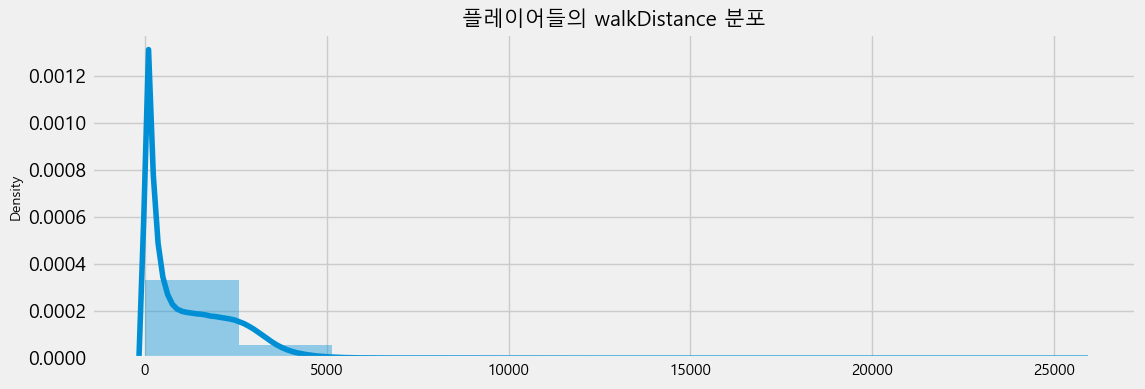

In [12]:
## 플레이어들의 walkDistance 분포
plt.figure(figsize=(12,4))
sns.distplot(x=train['walkDistance'], bins=10)
plt.title('플레이어들의 walkDistance 분포')
plt.show()

**해석**
* 대부분의 플레이어들은 한 매치 내에서 0~2500m 정도 도보로 이동하지만, 25000m를 넘는 경우도 존재함 (이상치 제거 필요)

<br>**플레이어들의 rideDistance 분포**

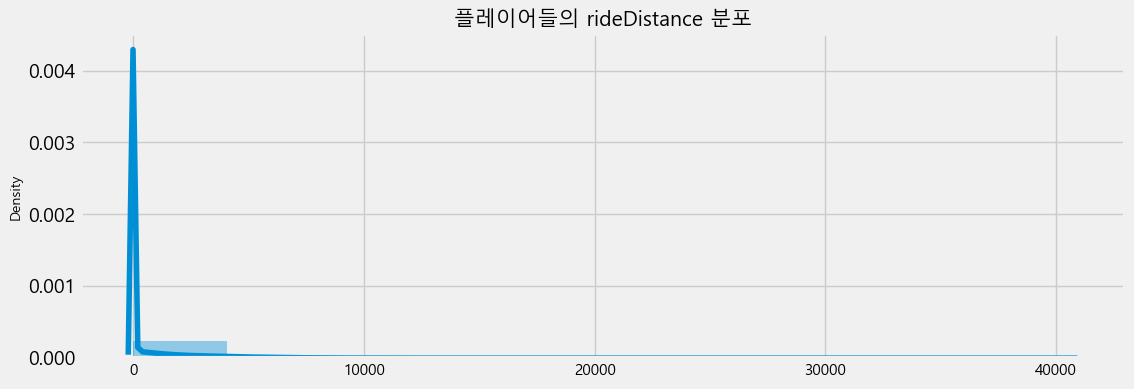

In [13]:
## 플레이어들의 rideDistance 분포
plt.figure(figsize=(12,4))
sns.distplot(x=train['rideDistance'], bins=10)
plt.title('플레이어들의 rideDistance 분포')
plt.show()

<br>**플레이어들의 swimDistance 분포**

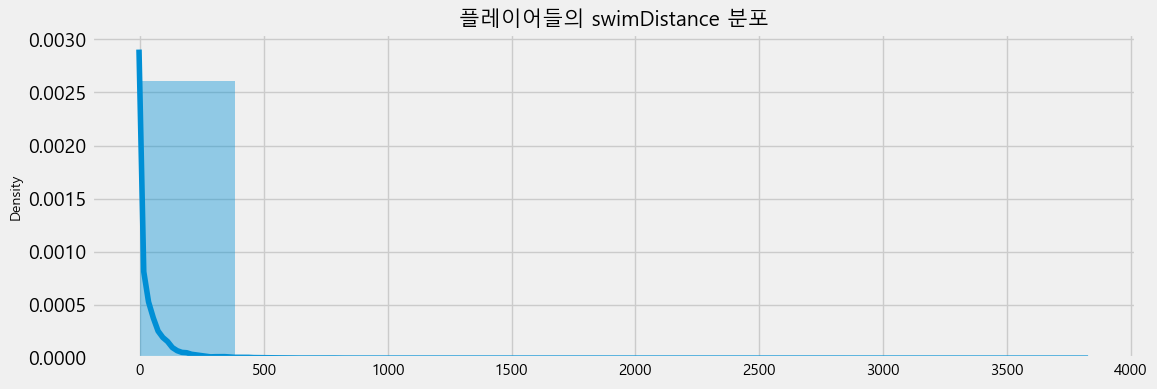

In [14]:
## 플레이어들의 swimDistance 분포
plt.figure(figsize=(12,4))
sns.distplot(x=train['swimDistance'], bins=10)
plt.title('플레이어들의 swimDistance 분포')
plt.show()

**해석**
* 대부분의 플레이어들은 수영을 통해 0~500m 정도 이동하지만, 3500m 이상인 경우도 존재함 (이상치 제거 필요)

## 한 매치당 몇 명의 플레이어가 참가할까?
* 한 매치에 95~98명의 플레이어가 참가하는 경우가 대부분임
* 대체적으로 매치는 참가 가능한 최대 플레이어 수 100명이 채워지는 편임

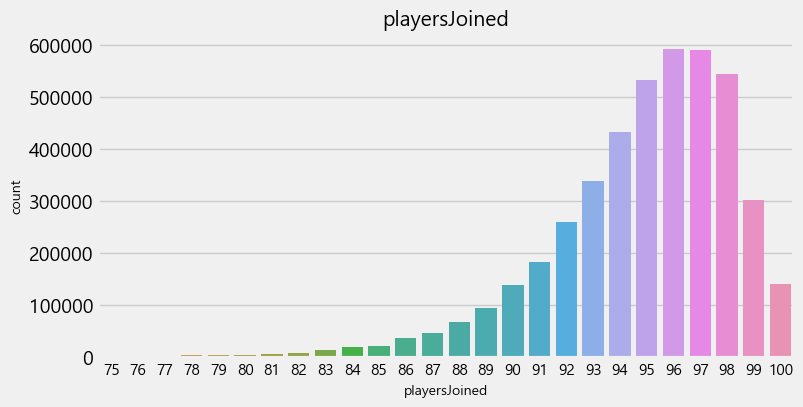

In [15]:
# "matchId"별로 playersJoined 계산하여 새로운 컬럼으로 추가
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
# 시각화
plt.figure(figsize=(8,4))
sns.countplot(x=train[train['playersJoined']>=75]['playersJoined'])  # 한 매치에 75명 이상 참가한 경우만 시각화
plt.title('playersJoined')
plt.show()

## 솔로/듀오/스쿼드 중 가장 승률이 높은 유형은?
* 대체적으로 솔로, 듀오, 스쿼드 순으로 승률이 높은 편임

In [16]:
# 매치 종류 확인
train['matchType'].value_counts()

matchType
squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: count, dtype: int64

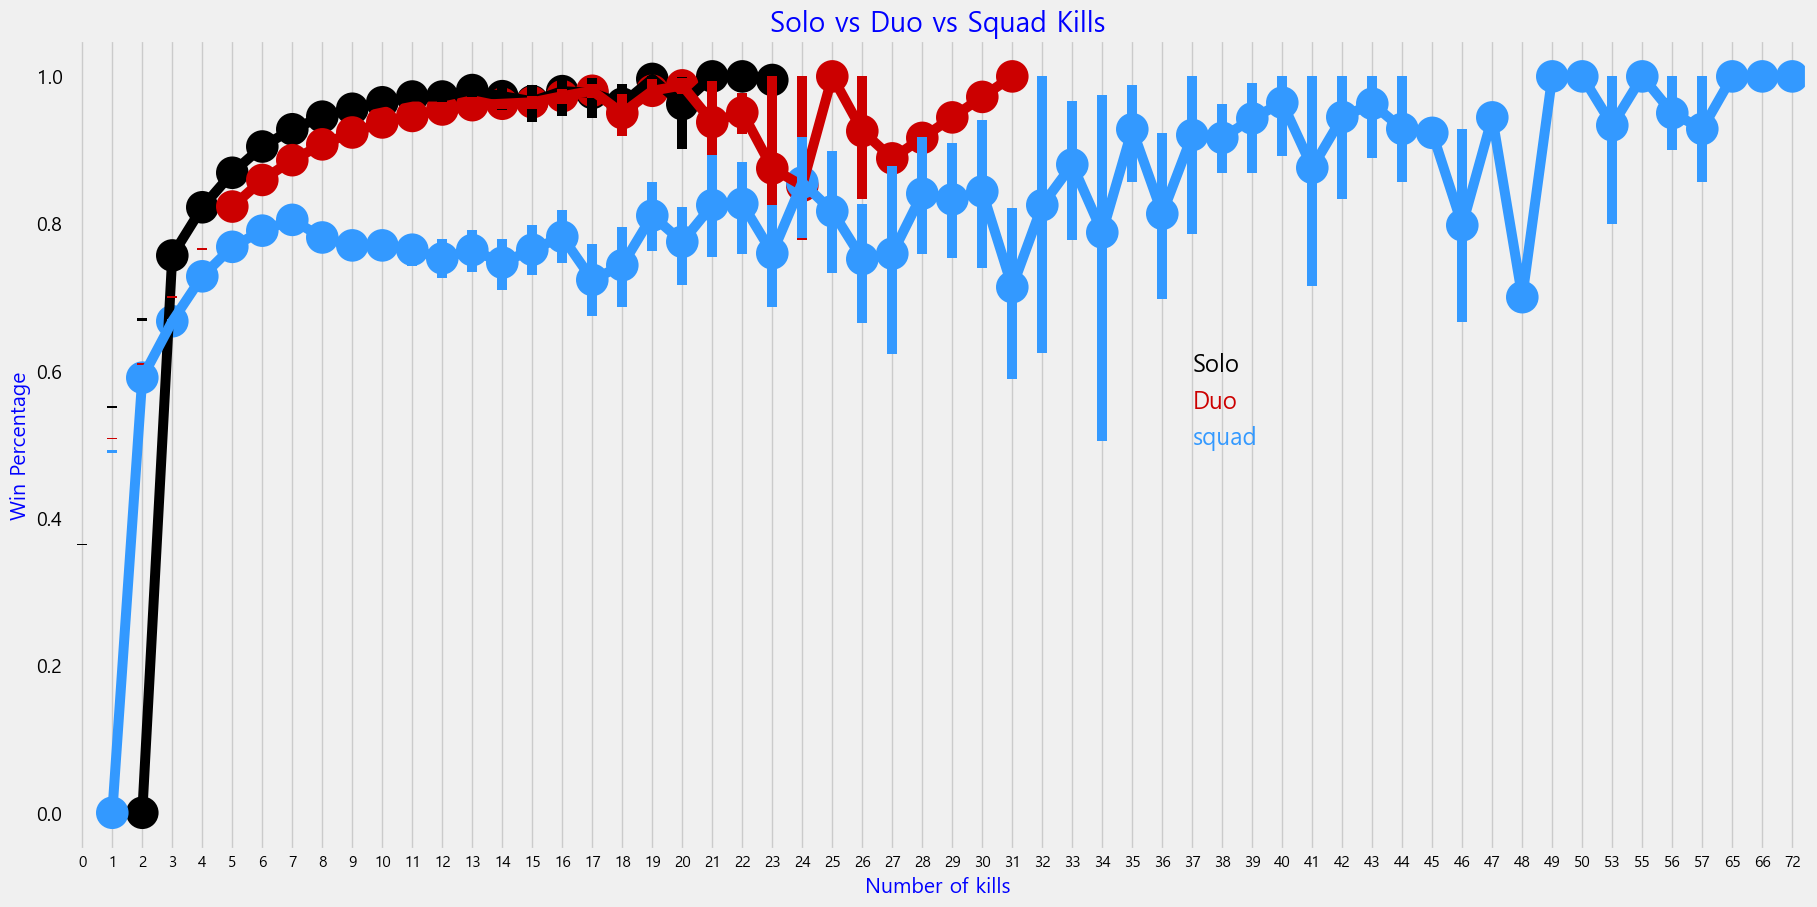

In [17]:
# "solo", "duo", "squad" 키워드가 포함된 데이터들만 추출
solo = train[train['numGroups'] > 50]
duo = train[(train['numGroups'] > 25) & (train['numGroups'] <= 50)]
squad = train[train['numGroups'] <= 25]

# 그래프 시각화
f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x='kills', y='winPlacePerc', data=solo, color='black')
sns.pointplot(x='kills', y='winPlacePerc', data=duo, color='#CC0000')
sns.pointplot(x='kills', y='winPlacePerc', data=squad, color='#3399FF')
plt.text(37,0.6, 'Solo', color='black', fontsize=17, style='italic')
plt.text(37,0.55, 'Duo', color='#CC0000', fontsize=17, style='italic')
plt.text(37,0.5, 'squad', color='#3399FF', fontsize=17, style='italic')
plt.xlabel('Number of kills', fontsize=15, color='blue')
plt.ylabel('Win Percentage', fontsize=15, color='blue')
plt.title('Solo vs Duo vs Squad Kills', fontsize=20, color='blue')
plt.grid()  # 그리드 표시
plt.show()

## Kill을 많이 할수록 승률이 올라갈까?
* 대부분의 경우 Kill 수가 많을 때 승률 또한 높은 것으로 보임

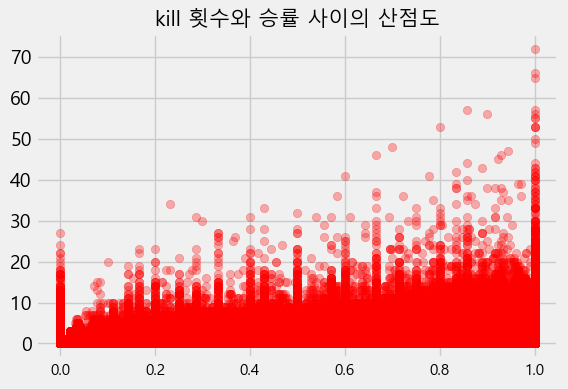

In [18]:
# kill 횟수와 승률의 산점도
plt.figure(figsize=(6,4))
plt.scatter(x = train['winPlacePerc'], y = train['kills'], color="red", alpha=0.3)
plt.title('kill 횟수와 승률 사이의 산점도')
plt.show()

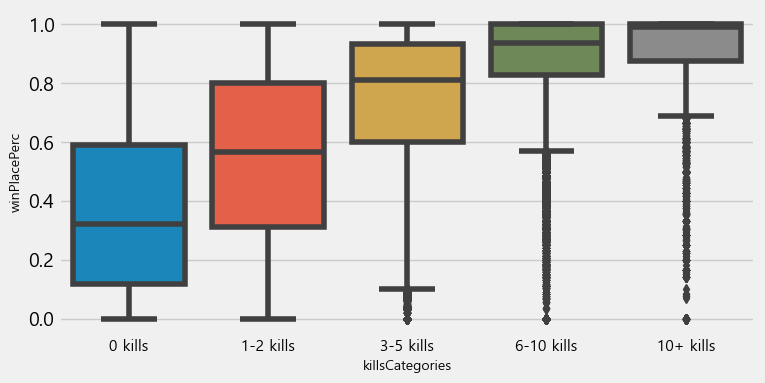

In [19]:
# kill 횟수 범주별 box plot
kills = train[['kills', 'winPlacePerc']]
kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 80], labels=['0 kills','1-2 kills', '3-5 kills', '6-10 kills', '10+ kills'])

plt.figure(figsize=(8,4))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

# 4. 데이터 전처리

## 결측치 처리
* "winPlacePerc"에 결측치 1개 존재 => 확인해본 결과, 오직 한 명의 플레이어만 참가한 경기인 것으로 판단되므로 해당 데이터 제거

In [20]:
# "winPlacePerc"에 결측치 1개 존재
print("결측치 개수:", train['winPlacePerc'].isnull().sum())

결측치 개수: 1


In [21]:
# 결측치가 포함된 데이터 확인
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0.0,0,0.0,0,0,0.0,0,0,NaN,1


In [22]:
# 결측치 행 제거 후 인덱스 재정렬
train = train.drop(2744604).reset_index(drop=True)

## 파생변수 생성

In [23]:
# 힐 횟수와 부스트 횟수를 더한 파생변수("healsandboosts") 생성
train['healsandboosts'] = train['heals'] + train['boosts']
# 기존변수("heals", "boosts") 제거
train.drop(['heals', 'boosts'], axis=1, inplace=True)

## 이상치 탐색
* `totalDistance`: 플레이어가 게임 중에 한 번도 움직이지 않으면서 kill 횟수가 1 이상인 경우, 이상치로 판단하고 제거
* `roadKills`: 로드킬을 10회 이상 실시한 경우, 이상치로 판단하고 제거
* `longestKill`, `walkDistance`, `rideDistance`, `swimDistance`: 각각1km, 10km, 20km, 2km 이상이면 이상치로 판단하고 제거

In [24]:
## 한 번도 움직이지 않으면서 kill 횟수가 1 이상인 경우 이상치로 판단 후 제거

# 플레이어가 움직인 총 거리를 나타내는 변수 생성 ("totalDistance")
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']

# 이상치 제거
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

# 필요 없는 변수 모두 제거해주기
train.drop(['totalDistance', 'killsWithoutMoving'], axis=1, inplace=True)

In [25]:
## "roadKills"을 10회 이상 실시한 경우 이상치로 판단 후 제거
train.drop(train[train['roadKills'] > 10].index, inplace=True)

In [26]:
## "longestKill"가 1km 이상이면 이상치로 판단하고 제거
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)
## Distance가 각각 10km, 20km, 2km 이상이면 이상치로 판단하고 제거
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)
train.drop(train[train['rideDistance'] >= 20000].index, inplace=True)
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

In [27]:
# 이상치를 모두 제거하고 남은 데이터 개수
train.shape

(4445024, 29)

## 범주형 변수 인코딩
* `matchType`: 원핫인코딩
* `groupId`, `matchId`: category형으로 변환 (group과 match 간 상관관계 활용)

In [28]:
## "matchType": 원핫인코딩
train = pd.get_dummies(train, columns=['matchType'])

# boolean(True/False)를 int(0,1)로 변환
train[train.columns[27:]] = train[train.columns[27:]].astype(int)

In [29]:
## "groupId", "matchId": category형으로 변환 후 숫자값으로 인코딩
train['groupId'] = train['groupId'].astype('category')
train['matchId'] = train['matchId'].astype('category')
train['groupId_cat'] = train['groupId'].cat.codes
train['matchId_cat'] = train['matchId'].cat.codes

# 기존 변수 제거
train.drop(['groupId', 'matchId'], axis=1, inplace=True)

# 인코딩이 잘 되었는지 확인
train[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,613630,30085
1,827634,32751
2,843325,3143
3,1340149,45260
4,1757447,20531


## 필요 없는 변수 제거

In [30]:
## 플레이어의 ID 컬럼 제거
print("Id 고유값 개수:", train['Id'].nunique())
train.drop("Id", axis=1, inplace=True)

Id 고유값 개수: 4445024


# 5. 학습 및 평가

In [31]:
## 머신러닝을 위한 패키지
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [32]:
## 디버깅을 위한 샘플링
sample = 500000
df_sample = train.sample(sample)

In [33]:
## target 변수 따로 저장
y = df_sample['winPlacePerc']
df = df_sample.drop('winPlacePerc', axis=1)

## 검증을 위한 데이터 분리

In [40]:
## train, valid 데이터 분리하는 함수 생성
def split_vals(a, n:int):
    return a[:n].copy(), a[n:].copy()
val_perc = 0.12
n_valid = int(val_perc * sample)
n_trn = len(df) - n_valid

# Split
raw_train, raw_valid = split_vals(df_sample, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

# 확인
print('train:', X_train.shape, 'target:', y_train.shape, 'validation:', X_valid.shape)

train: (440000, 42) target: (440000,) validation: (60000, 42)


## 평가 지표(MAE)

In [41]:
## 성능 평가 지표(MAE) 출력하는 함수 생성
def print_score(m: RandomForestRegressor):
    res = ['mae train:', mean_absolute_error(m.predict(X_train), y_train),
           'mae val:', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

## Basic RF Model 1

In [42]:
## Basic model 학습
rf = RandomForestRegressor(n_estimators=50,
                           min_samples_leaf=3,
                           max_features='sqrt',
                           n_jobs=-1)
rf.fit(X_train, y_train)
print_score(rf)

['mae train:', 0.041673329186753184, 'mae val:', 0.06266519503048588]


## Feature Importance

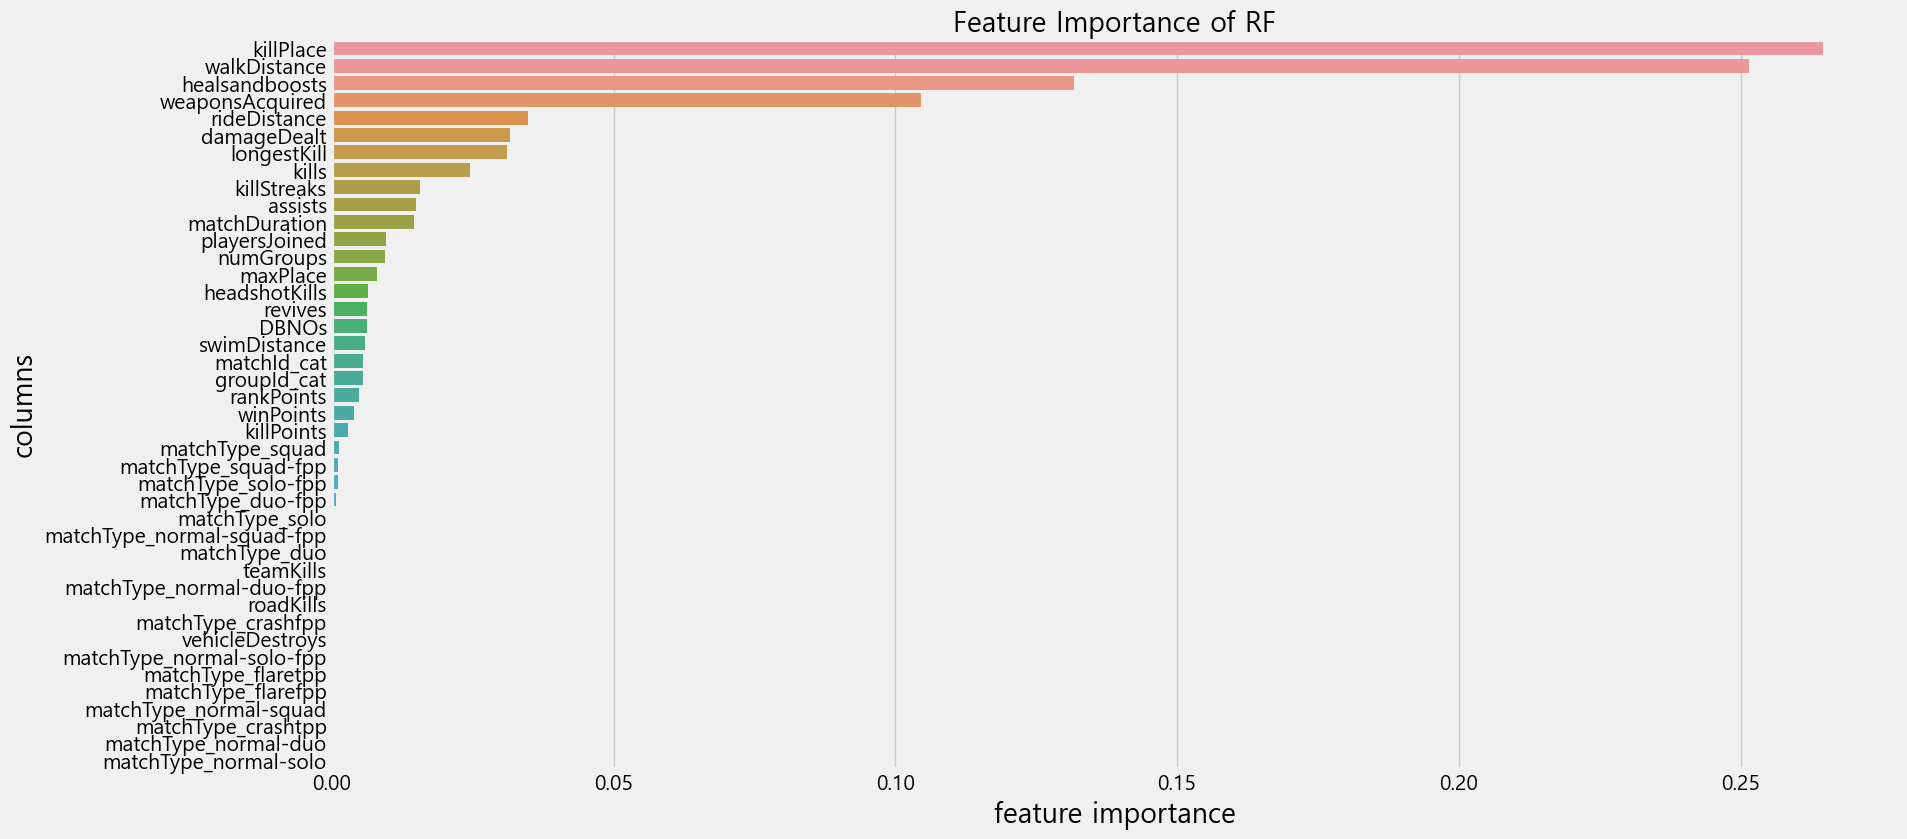

In [43]:
## Basic model의 변수중요도 확인
rf_feature_importance = pd.DataFrame(rf.feature_importances_, X_train.columns, columns=['Feature Importance'])
# 변수중요도 순서로 오름차순 정렬
rf_feature_importance = rf_feature_importance.sort_values('Feature Importance', ascending=False)

# 변수중요도 시각화
plt.figure(figsize=(18,9))
sns.barplot(x='Feature Importance', y=rf_feature_importance.index, orient='h', data=rf_feature_importance)
plt.title("Feature Importance of RF", size=20)

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('feature importance', size=20)
plt.ylabel('columns', size=20)
plt.show()

## RF Model 2
* 파라미터 조정: `n_estimators` 값 50 -> 80

In [44]:
## 파라미터 조정 후 학습
rf2 = RandomForestRegressor(n_estimators=80,
                           min_samples_leaf=3,
                           max_features='sqrt',
                           n_jobs=-1)
rf2.fit(X_train, y_train)
print_score(rf2)

['mae train:', 0.04123858030265405, 'mae val:', 0.06211411133651147]


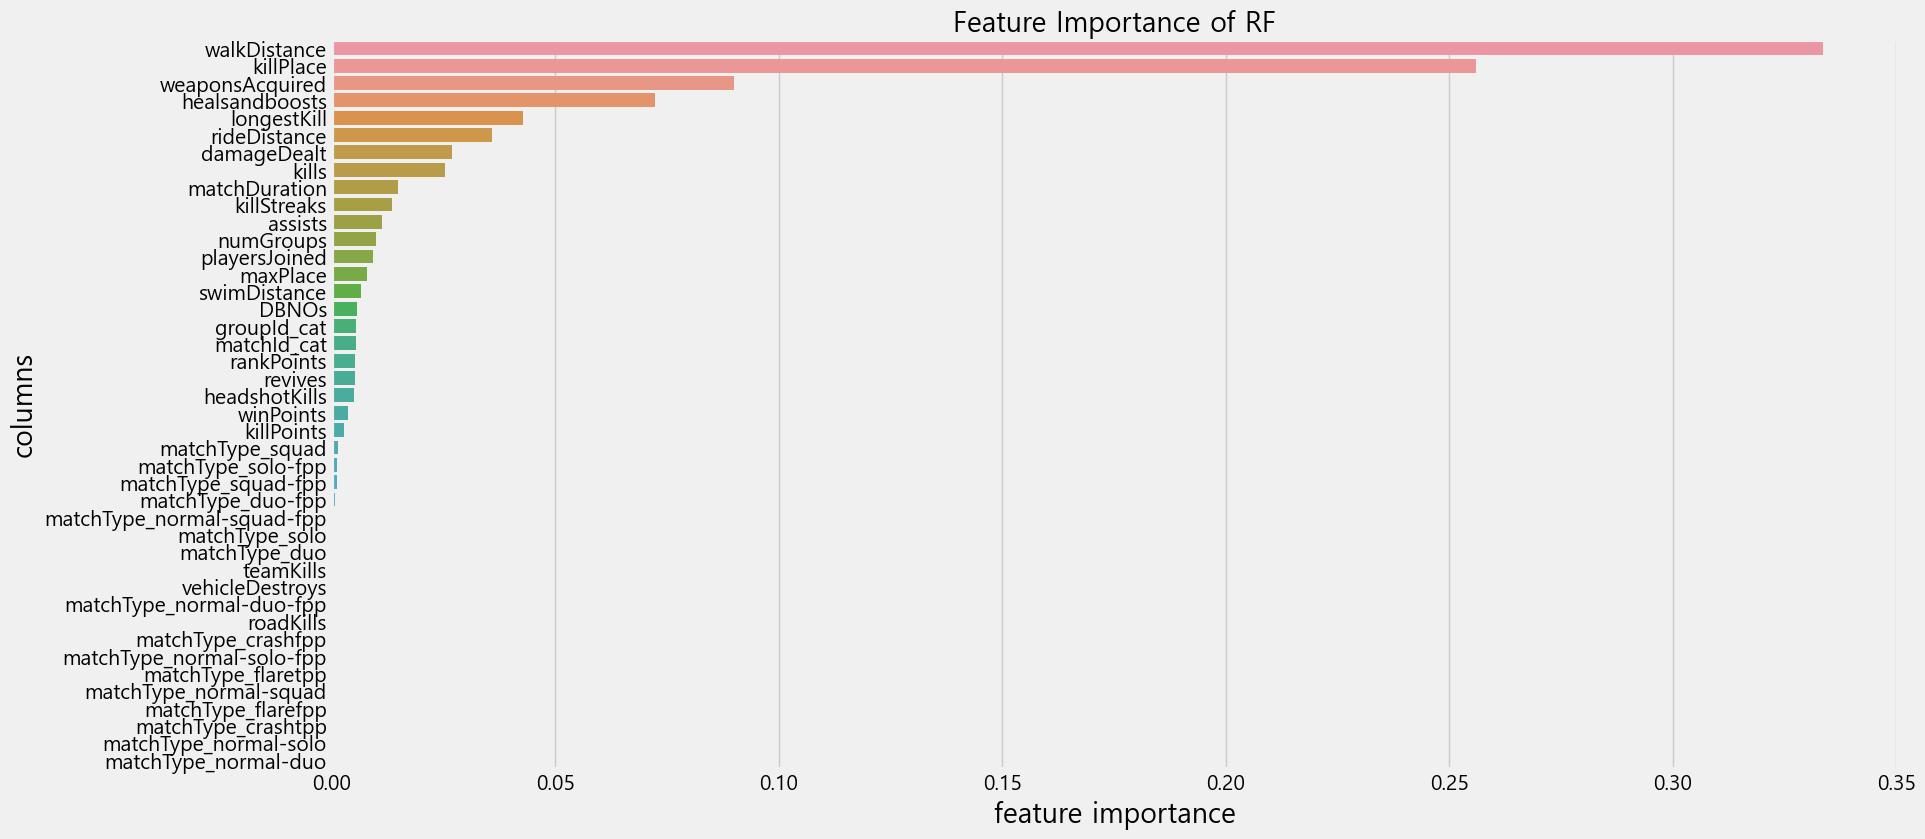

In [45]:
## Basic model의 변수중요도 확인
rf_feature_importance2 = pd.DataFrame(rf2.feature_importances_, X_train.columns, columns=['Feature Importance'])
# 변수중요도 순서로 오름차순 정렬
rf_feature_importance2 = rf_feature_importance2.sort_values('Feature Importance', ascending=False)

# 변수중요도 시각화
plt.figure(figsize=(18,9))
sns.barplot(x='Feature Importance', y=rf_feature_importance2.index, orient='h', data=rf_feature_importance2)
plt.title("Feature Importance of RF", size=20)

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('feature importance', size=20)
plt.ylabel('columns', size=20)
plt.show()

In [46]:
## Feature Importance > 0.05인 변수들만 추출
df_keep = df[rf_feature_importance2[rf_feature_importance2['Feature Importance'] > 0.05].index].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

### 상관관계

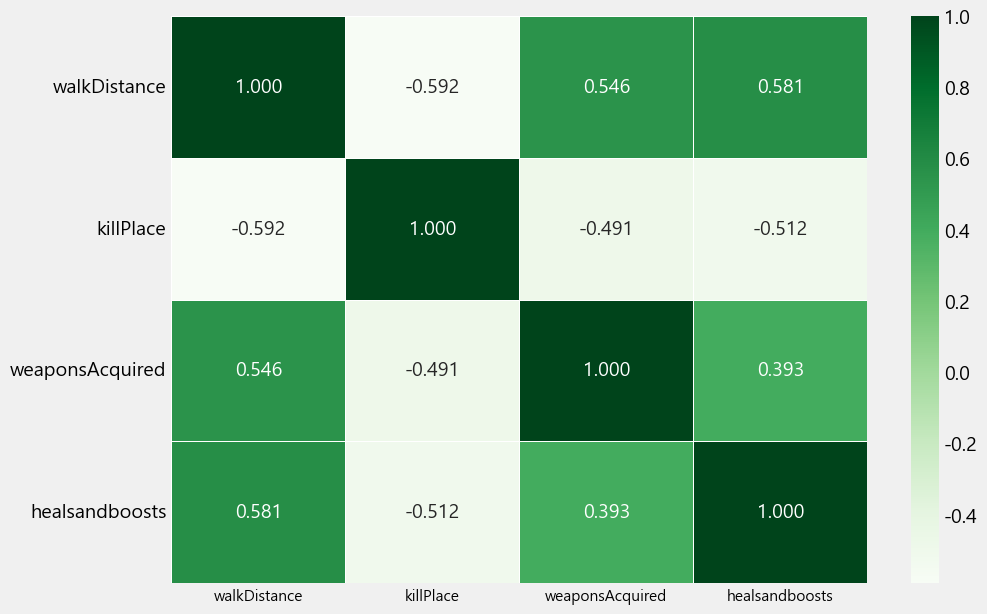

In [47]:
## 히트맵으로 상관관계 확인
corr = df_keep.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, cmap="Greens", annot=True, linewidths=0.5, fmt=".3f", cbar = True)
plt.show()

# 6. 최종 RF Model

In [48]:
## train, valid data 분리
val_perc_full = 0.2
n_valid_full = int(val_perc_full * len(train))
n_trn_full = len(train) - n_valid_full

# X, y 분리
y = train['winPlacePerc']
df_full = train.drop('winPlacePerc', axis=1)
# df_full = df_full[to_keep]

# Split
X_train, X_valid = split_vals(df_full, n_trn_full)
y_train, y_valid = split_vals(y, n_trn_full)

# 확인
print('train:', X_train.shape, 'target:', y_train.shape, 'validation:', X_valid.shape)

train: (3556020, 42) target: (3556020,) validation: (889004, 42)


In [50]:
## 최종 RF Model 학습
rf_final = RandomForestRegressor(n_estimators=80,
                                 min_samples_leaf=3,
                                 max_features='sqrt',
                                 n_jobs=-1)
rf_final.fit(X_train, y_train)
print_score(rf_final)

['mae train:', 0.0394811623200244, 'mae val:', 0.058680613710969526]
